# **The Environment Physics**

## v0.01
## The Spacecraft Thrusters

<img src= "docs/1.png" width="600" height="300">

## Updates:
- Better visuals

Enhance the Martian environment by adding stars to the background and creating three layers of atmosphere. The closer the layer is to the ground, the whiter it will be. Here's how you can achieve this:

1. **Stars in the Background**:
   - We'll randomly generate star positions and draw them on the screen.
   - Stars can be represented as small white circles.

2. **Three Layers of Atmosphere**:
   - We'll create three semi-transparent layers to simulate the Martian atmosphere.
   - The closest layer (closest to the ground) will be the whitest, while the farthest layer will be less opaque.



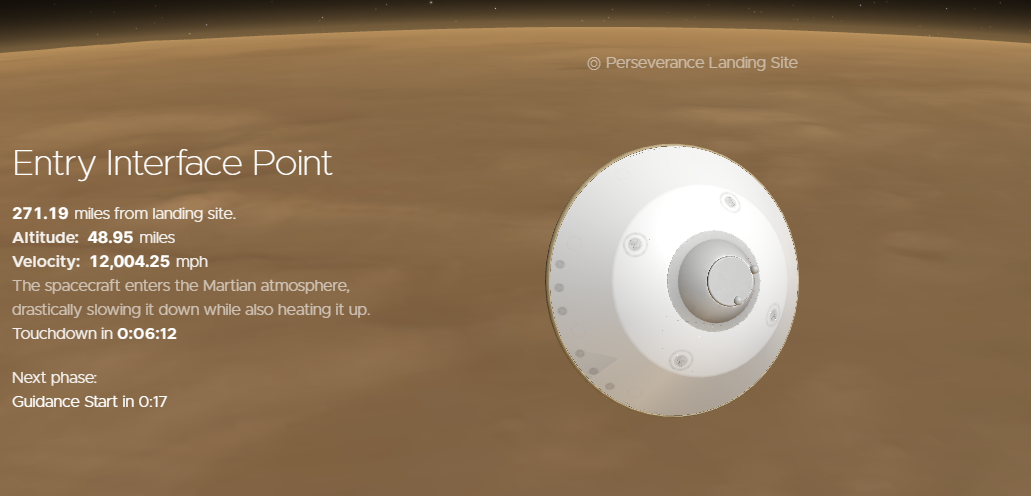

- Entry start altitude = 10 km
- Vel at start of entry = 5333 m/s
- time from entry = 6 minutes

### Enhancing the evirnomental parameters like atmosphere
We’ll consider the effects of air resistance and gravity at different altitudes. Here are the modified functions:

1. **`apply_air_resistance_v2(dt, density=0.02)`**:
   - Calculates and applies air resistance force to each component of the spacecraft's velocity.
   - The `density` parameter represents the air density (in kg/m^3) and defaults to 0.02 (approximate Martian surface density).
   - We'll adjust the drag coefficient based on the Mach number for both x and y components.
   - The updated velocity components will be returned.

2. **`calculate_drag_coefficient(mach_number)`**:
   - This function calculates the drag coefficient based on the Mach number.
   - You can replace the placeholder implementation with your actual model or lookup tables.

3. **`apply_gravity(dt)`**:
   - Updates the y-component of velocity due to Mars' gravity.
   - We'll use the global variable `y_velocity` and add the gravitational acceleration (`MARS_GRAVITY`) multiplied by the timestep (`dt`).

Source:
(1) Coupling and interactions across the Martian whole atmosphere ... - Nature. https://www.nature.com/articles/s41561-022-01118-7.
(2) Gravity Waves in Different Atmospheric Layers During Martian Dust .... https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021JE007170.
(3) Gravity Wave Activity in the Martian Atmosphere at Altitudes 20–160 km .... https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021JE006899.
(4) Gravity Wave Activity in the Martian Atmosphere at Altitudes 20–160 km .... https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2021JE006899.
(5) Mars Atmosphere Model - Metric Units - NASA. https://www.grc.nasa.gov/WWW/K-12/airplane/atmosmrm.html.
(6) Mars Fact Sheet - NSSDCA. https://nssdc.gsfc.nasa.gov/planetary/factsheet/marsfact.html.
(7) Martian Atmosphere – Center for Planetary Sciences. https://planetary-science.org/mars-research/martian-atmosphere/.
(8) A method of estimating the Martian neutral atmospheric density at 130 .... https://agupubs.onlinelibrary.wiley.com/doi/10.26464/epp2020038.
(9) Martian Atmosphere Profiles – NASA Mars Exploration. https://mars.nasa.gov/resources/3336/martian-atmosphere-profiles/.
(10) A Study of Past, Present, and Future Mars Rotorcraft. https://ntrs.nasa.gov/api/citations/20210000448/downloads/1459_Radotich_011321.pdf.
(11) UCSB Science Line. http://scienceline.ucsb.edu/getkey.php?key=3110.
(12) Corrosion on Mars: Effect of the Mars Environment on Spacecraft .... https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20190027256.pdf.


# **V0.3 Will HAVE**

### Let’s create an atmospheric density profile for Mars that accounts for different altitudes.


1. **Lower Atmosphere (Surface to 7,000 meters)**:
   - In the lower atmosphere, the temperature decreases linearly with altitude, and the pressure decreases exponentially.
   - The rate of temperature decrease is called the lapse rate.
   - For the temperature \(T\) (in Celsius degrees), the pressure \(p\) (in kilo-Pascals), and the altitude \(h\) (in meters), the metric units curve fits are:
     \[ T = -31 - 0.000998 \cdot h \]
     \[ p = 0.699 \cdot \exp(-0.00009 \cdot h) \]

2. **Upper Atmosphere (Above 7,000 meters)**:
   - In the upper atmosphere, the temperature also decreases linearly, and the pressure decreases exponentially.
   - The metric units curve fits for the upper atmosphere are:
     \[ T = -23.4 - 0.00222 \cdot h \]
     \[ p = 0.699 \cdot \exp(-0.00009 \cdot h) \]

3. **Density Calculation**:
   - The density \(r\) is derived from the equation of state:
     \[ r = \frac{p}{0.1921 \cdot (T + 273.1)} \]

Keep in mind that this model is an approximation, and the Martian atmosphere can exhibit complex variations. However, it should serve as a useful reference for spacecraft designers and simulations. 🚀🪐

Source: Conversation with Bing, 3/30/2024
(1) Mars Atmosphere Model - Metric Units - NASA. https://www.grc.nasa.gov/WWW/K-12/airplane/atmosmrm.html.
(2) Atmosphere of Mars - Wikipedia. https://en.wikipedia.org/wiki/Atmosphere_of_Mars.
(3) Martian Atmosphere – Center for Planetary Sciences. http://planetary-science.org/mars-research/martian-atmosphere/.
(4) Neutral density distribution in the Martian upper atmosphere. The .... https://www.researchgate.net/figure/Neutral-density-distribution-in-the-Martian-upper-atmosphere-The-density-profiles-of_fig1_346933661.
(5) A method of estimating the Martian neutral atmospheric density at 130 .... https://agupubs.onlinelibrary.wiley.com/doi/10.26464/epp2020038.


## To get more acurate results
- Adding density grediant curve

- 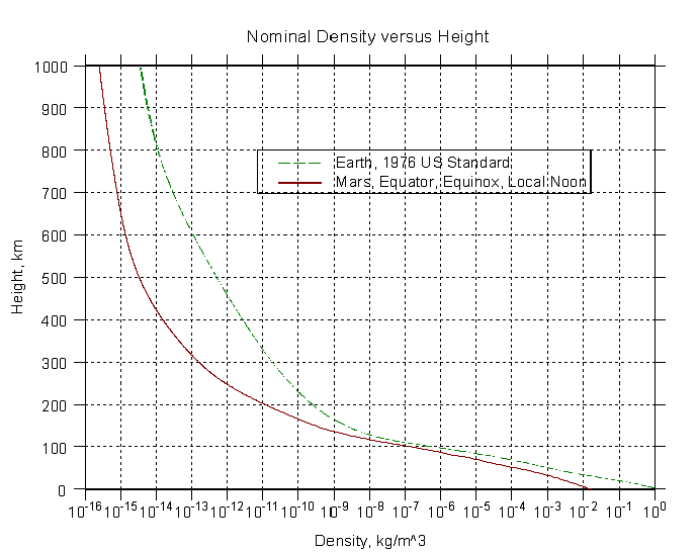

- refernce 
https://www.researchgate.net/figure/5-Comparison-of-Nominal-Atmospheric-Density-versus-Height-for-Earth-and-Mars-NASA_fig8_286060091

In [14]:
import numpy as np

def mars_atmospheric_density(altitude):
    """
    Calculates the atmospheric density on Mars at a given altitude.

    Args:
        altitude: Altitude in meters.

    Returns:
        Density in kg/m^3.
    """
    # Define the altitude ranges for the lower and upper atmosphere
    lower_atmosphere_altitude = 7000  # meters

    # Calculate temperature and pressure based on altitude
    if altitude <= lower_atmosphere_altitude:
        # Lower atmosphere (surface to 7,000 meters)
        temperature = -31 - 0.000998 * altitude
        pressure = 0.699 * np.exp(-0.00009 * altitude)
    else:
        # Upper atmosphere (above 7,000 meters)
        temperature = -23.4 - 0.00222 * altitude
        pressure = 0.699 * np.exp(-0.00009 * altitude)

    # Calculate density using the ideal gas law
    density = pressure / (0.1921 * (temperature + 273.1))

    return density

# Example usage:
altitude_meters = 5000 # Example altitude (adjust as needed)
density_at_altitude = mars_atmospheric_density(altitude_meters)
print(f"At {altitude_meters} meters altitude, the density on Mars is approximately {density_at_altitude:.4f} kg/m^3.")


At 5000 meters altitude, the density on Mars is approximately 0.0098 kg/m^3.


### We need to add a big step of density at the 60km stage the desity increases a lot

In [ ]:
import numpy as np

def mars_atmospheric_density(altitude):
    """
    Calculates the atmospheric density on Mars at a given altitude.

    Args:
        altitude: Altitude in meters.

    Returns:
        Density in kg/m^3.
    """
    # Define the altitude ranges for the lower and upper atmosphere
    lower_atmosphere_altitude = 7000  # meters

    # Calculate temperature and pressure based on altitude
    if altitude <= lower_atmosphere_altitude:
        # Lower atmosphere (surface to 7,000 meters)
        temperature = -31 - 0.000998 * altitude
        pressure = 0.699 * np.exp(-0.00009 * altitude)
    else:
        # Upper atmosphere (above 7,000 meters)
        temperature = -23.4 - 0.00222 * altitude
        pressure = 0.699 * np.exp(-0.00009 * altitude)

    # Calculate density using the ideal gas law
    density = pressure / (0.1921 * (temperature + 273.1))

    return density

# Example usage:
altitude_meters = 5000 # Example altitude (adjust as needed)
density_at_altitude = mars_atmospheric_density(altitude_meters)
print(f"At {altitude_meters} meters altitude, the density on Mars is approximately {density_at_altitude:.4f} kg/m^3.")


At 5000 meters altitude, the density on Mars is approximately 0.0098 kg/m^3.




Source:
(1) Mars Atmosphere Model - Metric Units - NASA. https://www.grc.nasa.gov/WWW/K-12/airplane/atmosmrm.html.
(2) The atmosphere of Mars as observed by InSight - Nature. https://www.nature.com/articles/s41561-020-0534-0.
(3) Mars Atmosphere Equation - Metric | Glenn Research Center | NASA. https://www1.grc.nasa.gov/beginners-guide-to-aeronautics/mars-atmosphere-equation-metric/.
(4) Mars Atmosphere Model - Metric Units - NASA. https://www.grc.nasa.gov/WWW/k-12/VirtualAero/BottleRocket/airplane/atmosmrm.html.